In [36]:
import pandas as pd # to read CSV files (Comma Separated Values)

train_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.x.csv')
train_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att18,att19,att20,att21,att22,att23,att24,att25,att26,msd_track_id
0,1,41.08,6.579,4.307,3.421,3.192,2.076,2.179,2.052,1.794,...,1.3470,-0.2463,-1.5470,0.17920,-1.1530,-0.7370,0.40750,-0.67190,-0.05147,TRPLTEM128F92E1389
1,2,60.80,5.973,4.344,3.261,2.835,2.725,2.446,1.884,1.962,...,-0.3316,0.3519,-1.4760,0.52700,-2.1960,1.5990,-1.39000,0.22560,-0.72080,TRJWMBQ128F424155E
2,3,51.47,4.971,4.316,2.916,3.112,2.290,2.053,1.934,1.878,...,-0.2803,-0.1603,-0.1355,1.03500,0.2370,1.4890,0.02959,-0.13670,0.10820,TRRZWMO12903CCFCC2
3,4,41.28,6.610,4.411,2.602,2.822,2.126,1.984,1.973,1.945,...,-1.6930,1.0040,-0.3953,0.26710,-1.0450,0.4974,0.03724,1.04500,-0.20000,TRBZRUT12903CE6C04
4,5,54.17,8.945,4.685,4.208,3.154,3.527,2.733,2.202,2.686,...,2.4690,-0.5449,-0.5622,-0.08968,-0.9823,-0.2445,-1.65800,-0.04825,-0.70950,TRLUJQF128F42AF5BF


In [37]:
train_y = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.y.csv')
train_y.head()

,Id,class_label
0,1,International
1,2,Vocal
2,3,Latin
3,4,Blues
4,5,Vocal


In [38]:
test_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/test.x.csv')
test_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26
0,1,38.22,8.076,6.935,4.696,3.856,3.465,2.922,2.568,2.070,...,3.988,0.4957,0.1836,-2.2210,0.6453,-0.2923,1.2000,-0.09179,0.4674,0.2158
1,2,36.42,6.131,5.364,4.292,3.968,2.937,2.872,2.142,2.050,...,7.098,1.2290,0.5971,-1.0670,0.9569,-1.8240,2.3130,-0.80890,0.5612,-0.6225
2,3,70.01,5.496,4.698,3.699,3.258,2.293,2.680,2.226,2.034,...,4.449,0.4773,1.6370,-1.0690,2.4160,-0.6299,1.4190,-0.81960,0.9151,-0.5948
3,4,40.64,7.281,6.702,4.043,3.729,3.043,2.644,2.366,1.940,...,2.785,1.9000,-1.1370,1.2750,1.7920,-2.1250,1.6090,-0.83230,-0.1998,-0.1218
4,5,38.85,7.118,5.703,4.825,4.088,3.823,3.254,2.551,2.193,...,4.536,2.1470,1.0200,-0.2656,2.8050,0.2762,0.2504,1.04900,0.3447,-0.7689


In [39]:
test_y_sample = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/submission-random.csv')
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991


In [40]:
test_y_sample[:0]

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal


In [41]:
import numpy as np

train_X = np.array(train_x)
train_Y = np.array(train_y[:]['class_label'])
test_X = np.array(test_x)

# Getting rid of the first and the last column: Id and msd_track_id
X_train_val = np.array(train_X[:, 1:-1], dtype=float)
X_test = np.array(test_X[:, 1:], dtype=float)

train_Y.shape

(13000,)

In [42]:
from collections import Counter

# Count the freq of the keys in the training labels
counted_labels = Counter(train_Y)
labels_keys = counted_labels.keys()
labels_keys

dict_keys(['International', 'Vocal', 'Latin', 'Blues', 'Jazz', 'Folk', 'RnB', 'Pop_Rock', 'New_Age', 'Rap', 'Reggae', 'Electronic', 'Country'])

In [43]:
labels_keys_sorted = sorted(labels_keys)
labels_keys_sorted

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [44]:
# This for loop for creating a dictionary/ vocab
key_to_val = {key: val for val, key in enumerate(labels_keys_sorted)}
key_to_val['Country']
key_to_val

{'Blues': 0,
 'Country': 1,
 'Electronic': 2,
 'Folk': 3,
 'International': 4,
 'Jazz': 5,
 'Latin': 6,
 'New_Age': 7,
 'Pop_Rock': 8,
 'Rap': 9,
 'Reggae': 10,
 'RnB': 11,
 'Vocal': 12}

In [45]:
val_to_key = {val: key for val, key in enumerate(labels_keys_sorted)}
val_to_key[1]
val_to_key

{0: 'Blues',
 1: 'Country',
 2: 'Electronic',
 3: 'Folk',
 4: 'International',
 5: 'Jazz',
 6: 'Latin',
 7: 'New_Age',
 8: 'Pop_Rock',
 9: 'Rap',
 10: 'Reggae',
 11: 'RnB',
 12: 'Vocal'}

In [46]:
Y_train_vec = []
for each in train_y[:]['class_label']:
#     print(each, key_to_val[each])
    Y_train_vec.append(key_to_val[each])

Y_train_val = np.array(Y_train_vec)
Y_train_val.shape

(13000,)

In [47]:
# # Pre-processing: normalizing
# def normalize(X):
#     # max scale for images 255= 2**8= 8 bit grayscale for each channel
#     return (X - X.mean(axis=0)) #/ X.std(axis=0)
# X_train, X_val, X_test = normalize(X=X_train), normalize(X=X_val), normalize(X=X_test)

# Preprocessing: normalizing the data based on the training set
mean = X_train_val.mean(axis=0)
std = X_train_val.std(axis=0)

X_train_val, X_test = (X_train_val - mean)/ std, (X_test - mean)/ std
X_train_val.shape, X_test.shape, X_train_val.dtype, X_test.dtype

((13000, 26), (10400, 26), dtype('float64'), dtype('float64'))

In [48]:
# Creating validation set: 10% or 1/10 of the training set or whatever dataset with labels/ annotation
valid_size = X_train_val.shape[0]//10
valid_size
X_val = X_train_val[-valid_size:]
Y_val = Y_train_val[-valid_size:]
X_train = X_train_val[: -valid_size]
Y_train = Y_train_val[: -valid_size]
X_train_val.shape, 
X_train.shape, X_val.shape, X_test.shape, Y_val.shape, Y_train.shape 
# X_train.dtype, X_val.dtype
# Y_train.dtype, Y_val

((11700, 26), (1300, 26), (10400, 26), (1300,), (11700,))

In [49]:
# Model
import impl.layer as l # or from impl.layer import *
from impl.loss import * # import all functions from impl.loss file # import impl.loss as loss_func
from sklearn.utils import shuffle as skshuffle

class FFNN:

    def __init__(self, D, C, H, L):
        self.L = L # number of layers or depth
        self.losses = {'train':[], 'valid':[], 'valid_acc':[]}
        
        # The adaptive/learnable/updatable random feedforward
        self.model = []
        self.W_fixed = []
        self.grads = []
        self.ys_prev = []
        low, high = -1, 1
        
        # Input layer: weights/ biases
        m = dict(W=np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.), b=np.zeros((1, H)))
        self.model.append(m)
        # Fixed feedback weight
        m = np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.)
        self.W_fixed.append(m)
        # Input layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[0].items()})
        # Previous output layer
        self.ys_prev.append(0.0)

        # Hidden layers: weights/ biases
        m_L = []
        for _ in range(L):
            m = dict(W=np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.), b=np.zeros((1, H)))
            m_L.append(m)
        self.model.append(m_L)
        # Fixed feedback weight
        m_L = []
        for _ in range(L):
            m = np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.)
            m_L.append(m)
        self.W_fixed.append(m_L)
        # Hidden layer: gradients
        grad_L = []
        for _ in range(L):
            grad_L.append({key: np.zeros_like(val) for key, val in self.model[1][0].items()})
        self.grads.append(grad_L)
        # Previous output layer
        ys_prev_L = []
        for _ in range(L):
            ys_prev_L.append(0.0)
        self.ys_prev.append(ys_prev_L)
        
        # Output layer: weights/ biases
        m = dict(W=np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.), b=np.zeros((1, C)))
        self.model.append(m)
        # Fixed feedback weight
        m = np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.)
        self.W_fixed.append(m)
        # Outout layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[2].items()})
        # Previous output layer
        self.ys_prev.append(0.0)
        
    def fc_forward(self, X, W, b):
        out = (X @ W) + b
        cache = (W, X)
        return out, cache

    def fc_backward(self, dout, cache, W_fixed):
        W, X = cache

        dW = X.T @ dout
        db = np.sum(dout, axis=0).reshape(1, -1) # db_1xn
        
        dX = dout @ W.T # Backprop
#         dX = dout @ W_fixed.T # fb alignment

        return dX, dW, db

    def train_forward(self, X, train):
        caches, ys = [], []
        
        # Input layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[0]['W'], b=self.model[0]['b']) # X_1xD, y_1xc
        y, nl_cache = l.tanh_forward(X=y)
        if train:
            caches.append((fc_cache, nl_cache))
        ys.append(y) # ys[0]
        X = y.copy() # pass to the next layer
        
        # Hidden layers
        fc_caches, nl_caches, ys_L = [], [], []
        for layer in range(self.L):
            y, fc_cache = self.fc_forward(X=X, W=self.model[1][layer]['W'], b=self.model[1][layer]['b'])
            y, nl_cache = l.tanh_forward(X=y)
            ys_L.append(y) # ys[1][layer]
            X = y.copy() # pass to next layer
            if train:
                fc_caches.append(fc_cache)
                nl_caches.append(nl_cache)
        if train:
            caches.append((fc_caches, nl_caches)) # caches[1]            
        ys.append(ys_L) # ys[1]            
        
        # Output layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[2]['W'], b=self.model[2]['b'])
        if train:
            caches.append(fc_cache)
        ys.append(y) # ys[2]

        return ys, caches # for backpropating the error

    def loss_function(self, y, y_train):
        
        loss = cross_entropy(y, y_train) # softmax is included
        dy = dcross_entropy(y, y_train) # dsoftmax is included
        
        return loss, dy
        
    def train_backward(self, dy, caches, ys):
        grads, ys_prev = self.grads, self.ys_prev # initialized by Zero in every iteration/epoch
        
        # Output layer
        fc_cache = caches[2]
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache, W_fixed=self.W_fixed[2])
        dy = dX.copy()
        grads[2]['W'] = dW
        grads[2]['b'] = db

        # Hidden layer
        fc_caches, nl_caches = caches[1]
        for layer in reversed(range(self.L)):
#             dy *= ys[1][layer] - ys_prev[1][layer] # temporal diff instead of differentiable function
            dy = l.tanh_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dX, dW, db = self.fc_backward(dout=dy, cache=fc_caches[layer], W_fixed=self.W_fixed[1][layer])
            dy = dX.copy()
            grads[1][layer]['W'] = dW
            grads[1][layer]['b'] = db
        
        # Input layer
        fc_cache, nl_cache = caches[0]
#         dy *= ys[0] - ys_prev[0] # temporal diff instead of differentiable function
        dy = l.tanh_backward(cache=nl_cache, dout=dy) # diffable function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache, W_fixed=self.W_fixed[0])
        grads[0]['W'] = dW
        grads[0]['b'] = db

        return dX, grads
    
    def test(self, X):
        ys_logit, _ = self.train_forward(X, train=False)
        y_logit = ys_logit[2] # last layer
        
        # if self.mode == 'classification':
        y_prob = l.softmax(y_logit) # for accuracy == acc
        y_pred = np.argmax(y_prob, axis=1) # for loss ==err
        
        return y_pred, y_logit
        
    def get_minibatch(self, X, y, minibatch_size, shuffle):
        minibatches = []

        if shuffle:
            X, y = skshuffle(X, y)

        for i in range(0, X.shape[0], minibatch_size):
            X_mini = X[i:i + minibatch_size]
            y_mini = y[i:i + minibatch_size]
            minibatches.append((X_mini, y_mini))

        return minibatches

    def sgd(self, train_set, val_set, alpha, mb_size, n_iter, print_after):
        X_train, y_train = train_set
        X_val, y_val = val_set

        # Epochs
        for iter in range(1, n_iter + 1):

            # Minibatches
            minibatches = self.get_minibatch(X_train, y_train, mb_size, shuffle=True)
            idx = np.random.randint(0, len(minibatches))
            X_mini, y_mini = minibatches[idx]
            
            # Train the model
            ys, caches = self.train_forward(X_mini, train=True)
            loss, dy = self.loss_function(ys[2], y_mini)
            _, grads = self.train_backward(dy, caches, ys) # ys[0], ys[1] and ys_prev are used for backprop
            self.ys_prev = ys # for next iteration or epoch learning dW and db
            self.losses['train'].append(loss)
            
            # Update the model for input layer
            for key in grads[0].keys():
                self.model[0][key] -= alpha * grads[0][key]

            # Update the model for the hidden layers
            for layer in range(self.L):
                for key in grads[1][layer].keys():
                    self.model[1][layer][key] -= alpha * grads[1][layer][key]

            # Update the model for output layer
            for key in grads[2].keys():
                self.model[2][key] -= alpha * grads[2][key]
                
            # Validate the updated model
            y_pred, y_logit = self.test(X_val)
            valid_loss, _ = self.loss_function(y_logit, y_val) # softmax is included in entropy loss function
            self.losses['valid'].append(valid_loss)
            valid_acc = np.mean(y_pred == y_val) # confusion matrix
            self.losses['valid_acc'].append(valid_acc)
            
            # Print the model info: loss & accuracy or err & acc
            if iter % print_after == 0:
                print('Iter-{} train loss: {:.4f} valid loss: {:.4f}, valid accuracy: {:.4f}'.format(
                    iter, loss, valid_loss, valid_acc))

#         # Test the final model
#         y_pred, y_logit = nn.test(X_test)
#         loss, _ = self.loss_function(y_logit, y_test) # softmax is included in entropy loss function
#         acc = np.mean(y_pred == y_test)
#         print('Last iteration - Test accuracy mean: {:.4f}, std: {:.4f}, loss: {:.4f}'.format(
#             acc.mean(), acc.std(), loss))

In [50]:
Y_train.shape, X_train.shape, X_val.shape, Y_val.shape

((11700,), (11700, 26), (1300, 26), (1300,))

In [51]:
# Hyper-parameters
n_iter = 20000 # number of epochs
alpha = 1e-2 # learning_rate
mb_size = 50 # 2**10==1024 # width, timestep for sequential data or minibatch size
print_after = 10 # n_iter//10 # print loss for train, valid, and test
num_hidden_units = 32 # number of kernels/ filters in each layer
num_input_units = X_train.shape[1] # noise added at the input lavel as input noise we can use dX or for more improvement
num_output_units = Y_train.max() + 1 # number of classes in this classification problem
# num_output_units = Y_train.shape[1] # number of classes in this classification problem
num_layers = 2 # depth 

# Build the model/NN and learn it: running session.
nn = FFNN(C=num_output_units, D=num_input_units, H=num_hidden_units, L=num_layers)

nn.sgd(train_set=(X_train, Y_train), val_set=(X_val, Y_val), mb_size=mb_size, alpha=alpha, 
           n_iter=n_iter, print_after=print_after)

Iter-10 train loss: 2.5925 valid loss: 2.5490, valid accuracy: 0.1200
Iter-20 train loss: 2.5356 valid loss: 2.5449, valid accuracy: 0.1215
Iter-30 train loss: 2.5042 valid loss: 2.5406, valid accuracy: 0.1254
Iter-40 train loss: 2.5028 valid loss: 2.5373, valid accuracy: 0.1285
Iter-50 train loss: 2.4788 valid loss: 2.5339, valid accuracy: 0.1323
Iter-60 train loss: 2.5625 valid loss: 2.5300, valid accuracy: 0.1323
Iter-70 train loss: 2.4671 valid loss: 2.5263, valid accuracy: 0.1377
Iter-80 train loss: 2.4526 valid loss: 2.5226, valid accuracy: 0.1400
Iter-90 train loss: 2.4862 valid loss: 2.5188, valid accuracy: 0.1454
Iter-100 train loss: 2.5369 valid loss: 2.5153, valid accuracy: 0.1508
Iter-110 train loss: 2.4544 valid loss: 2.5119, valid accuracy: 0.1500
Iter-120 train loss: 2.5334 valid loss: 2.5081, valid accuracy: 0.1523
Iter-130 train loss: 2.4852 valid loss: 2.5045, valid accuracy: 0.1523
Iter-140 train loss: 2.4347 valid loss: 2.5005, valid accuracy: 0.1562
Iter-150 train 

Iter-1180 train loss: 2.1345 valid loss: 2.2119, valid accuracy: 0.2300
Iter-1190 train loss: 2.2626 valid loss: 2.2110, valid accuracy: 0.2300
Iter-1200 train loss: 2.0953 valid loss: 2.2095, valid accuracy: 0.2331
Iter-1210 train loss: 2.2253 valid loss: 2.2087, valid accuracy: 0.2331
Iter-1220 train loss: 2.0300 valid loss: 2.2077, valid accuracy: 0.2315
Iter-1230 train loss: 2.1422 valid loss: 2.2067, valid accuracy: 0.2323
Iter-1240 train loss: 2.3045 valid loss: 2.2059, valid accuracy: 0.2315
Iter-1250 train loss: 2.0422 valid loss: 2.2046, valid accuracy: 0.2331
Iter-1260 train loss: 2.2176 valid loss: 2.2031, valid accuracy: 0.2354
Iter-1270 train loss: 2.2155 valid loss: 2.2014, valid accuracy: 0.2408
Iter-1280 train loss: 2.0586 valid loss: 2.1999, valid accuracy: 0.2377
Iter-1290 train loss: 2.2441 valid loss: 2.1983, valid accuracy: 0.2400
Iter-1300 train loss: 2.0162 valid loss: 2.1973, valid accuracy: 0.2385
Iter-1310 train loss: 2.1226 valid loss: 2.1966, valid accuracy:

Iter-2330 train loss: 2.0721 valid loss: 2.1153, valid accuracy: 0.2838
Iter-2340 train loss: 2.1320 valid loss: 2.1147, valid accuracy: 0.2846
Iter-2350 train loss: 2.0865 valid loss: 2.1144, valid accuracy: 0.2838
Iter-2360 train loss: 2.0280 valid loss: 2.1142, valid accuracy: 0.2792
Iter-2370 train loss: 2.0691 valid loss: 2.1132, valid accuracy: 0.2785
Iter-2380 train loss: 2.1288 valid loss: 2.1122, valid accuracy: 0.2808
Iter-2390 train loss: 2.1305 valid loss: 2.1121, valid accuracy: 0.2800
Iter-2400 train loss: 2.1045 valid loss: 2.1118, valid accuracy: 0.2792
Iter-2410 train loss: 2.1222 valid loss: 2.1114, valid accuracy: 0.2777
Iter-2420 train loss: 1.9451 valid loss: 2.1106, valid accuracy: 0.2815
Iter-2430 train loss: 2.1938 valid loss: 2.1096, valid accuracy: 0.2815
Iter-2440 train loss: 2.0166 valid loss: 2.1090, valid accuracy: 0.2831
Iter-2450 train loss: 2.0872 valid loss: 2.1080, valid accuracy: 0.2823
Iter-2460 train loss: 2.0575 valid loss: 2.1068, valid accuracy:

Iter-3470 train loss: 1.9025 valid loss: 2.0695, valid accuracy: 0.3069
Iter-3480 train loss: 1.9555 valid loss: 2.0691, valid accuracy: 0.3046
Iter-3490 train loss: 1.9269 valid loss: 2.0695, valid accuracy: 0.3038
Iter-3500 train loss: 1.9368 valid loss: 2.0687, valid accuracy: 0.3038
Iter-3510 train loss: 2.1345 valid loss: 2.0679, valid accuracy: 0.3038
Iter-3520 train loss: 2.0619 valid loss: 2.0673, valid accuracy: 0.3031
Iter-3530 train loss: 1.8658 valid loss: 2.0664, valid accuracy: 0.3038
Iter-3540 train loss: 2.0124 valid loss: 2.0671, valid accuracy: 0.3015
Iter-3550 train loss: 2.0715 valid loss: 2.0671, valid accuracy: 0.3000
Iter-3560 train loss: 1.8147 valid loss: 2.0661, valid accuracy: 0.3031
Iter-3570 train loss: 2.2164 valid loss: 2.0663, valid accuracy: 0.3054
Iter-3580 train loss: 2.0193 valid loss: 2.0658, valid accuracy: 0.3038
Iter-3590 train loss: 2.0735 valid loss: 2.0660, valid accuracy: 0.3038
Iter-3600 train loss: 2.0301 valid loss: 2.0649, valid accuracy:

Iter-4610 train loss: 1.8143 valid loss: 2.0412, valid accuracy: 0.3162
Iter-4620 train loss: 2.2102 valid loss: 2.0413, valid accuracy: 0.3162
Iter-4630 train loss: 1.9320 valid loss: 2.0420, valid accuracy: 0.3185
Iter-4640 train loss: 2.1201 valid loss: 2.0427, valid accuracy: 0.3154
Iter-4650 train loss: 1.9535 valid loss: 2.0426, valid accuracy: 0.3200
Iter-4660 train loss: 1.9579 valid loss: 2.0413, valid accuracy: 0.3231
Iter-4670 train loss: 1.8925 valid loss: 2.0411, valid accuracy: 0.3200
Iter-4680 train loss: 1.8815 valid loss: 2.0421, valid accuracy: 0.3200
Iter-4690 train loss: 1.9837 valid loss: 2.0414, valid accuracy: 0.3223
Iter-4700 train loss: 2.0213 valid loss: 2.0410, valid accuracy: 0.3223
Iter-4710 train loss: 2.0024 valid loss: 2.0413, valid accuracy: 0.3200
Iter-4720 train loss: 2.0427 valid loss: 2.0409, valid accuracy: 0.3254
Iter-4730 train loss: 1.8286 valid loss: 2.0413, valid accuracy: 0.3269
Iter-4740 train loss: 1.8961 valid loss: 2.0411, valid accuracy:

Iter-5750 train loss: 1.8571 valid loss: 2.0284, valid accuracy: 0.3338
Iter-5760 train loss: 2.2178 valid loss: 2.0279, valid accuracy: 0.3300
Iter-5770 train loss: 1.6705 valid loss: 2.0287, valid accuracy: 0.3315
Iter-5780 train loss: 1.9372 valid loss: 2.0284, valid accuracy: 0.3269
Iter-5790 train loss: 1.9975 valid loss: 2.0280, valid accuracy: 0.3277
Iter-5800 train loss: 1.9647 valid loss: 2.0281, valid accuracy: 0.3354
Iter-5810 train loss: 2.0140 valid loss: 2.0273, valid accuracy: 0.3346
Iter-5820 train loss: 2.2202 valid loss: 2.0265, valid accuracy: 0.3362
Iter-5830 train loss: 2.0061 valid loss: 2.0270, valid accuracy: 0.3385
Iter-5840 train loss: 1.7662 valid loss: 2.0266, valid accuracy: 0.3354
Iter-5850 train loss: 1.9070 valid loss: 2.0267, valid accuracy: 0.3346
Iter-5860 train loss: 1.8853 valid loss: 2.0261, valid accuracy: 0.3369
Iter-5870 train loss: 1.7674 valid loss: 2.0260, valid accuracy: 0.3369
Iter-5880 train loss: 1.8192 valid loss: 2.0258, valid accuracy:

Iter-6890 train loss: 1.6330 valid loss: 2.0139, valid accuracy: 0.3338
Iter-6900 train loss: 2.1804 valid loss: 2.0151, valid accuracy: 0.3331
Iter-6910 train loss: 1.8395 valid loss: 2.0150, valid accuracy: 0.3323
Iter-6920 train loss: 1.5707 valid loss: 2.0152, valid accuracy: 0.3323
Iter-6930 train loss: 1.7695 valid loss: 2.0143, valid accuracy: 0.3362
Iter-6940 train loss: 2.1391 valid loss: 2.0143, valid accuracy: 0.3423
Iter-6950 train loss: 1.9876 valid loss: 2.0137, valid accuracy: 0.3385
Iter-6960 train loss: 2.0882 valid loss: 2.0139, valid accuracy: 0.3392
Iter-6970 train loss: 1.7565 valid loss: 2.0126, valid accuracy: 0.3423
Iter-6980 train loss: 1.9207 valid loss: 2.0130, valid accuracy: 0.3385
Iter-6990 train loss: 1.9704 valid loss: 2.0136, valid accuracy: 0.3400
Iter-7000 train loss: 1.7532 valid loss: 2.0149, valid accuracy: 0.3369
Iter-7010 train loss: 2.0719 valid loss: 2.0153, valid accuracy: 0.3369
Iter-7020 train loss: 1.8284 valid loss: 2.0151, valid accuracy:

Iter-8030 train loss: 1.8945 valid loss: 2.0082, valid accuracy: 0.3446
Iter-8040 train loss: 1.8516 valid loss: 2.0085, valid accuracy: 0.3446
Iter-8050 train loss: 1.6692 valid loss: 2.0079, valid accuracy: 0.3462
Iter-8060 train loss: 1.9273 valid loss: 2.0078, valid accuracy: 0.3446
Iter-8070 train loss: 1.8204 valid loss: 2.0082, valid accuracy: 0.3469
Iter-8080 train loss: 1.8187 valid loss: 2.0087, valid accuracy: 0.3400
Iter-8090 train loss: 1.8781 valid loss: 2.0083, valid accuracy: 0.3392
Iter-8100 train loss: 2.1396 valid loss: 2.0088, valid accuracy: 0.3377
Iter-8110 train loss: 2.0383 valid loss: 2.0088, valid accuracy: 0.3392
Iter-8120 train loss: 2.0653 valid loss: 2.0078, valid accuracy: 0.3377
Iter-8130 train loss: 1.8361 valid loss: 2.0081, valid accuracy: 0.3392
Iter-8140 train loss: 2.0442 valid loss: 2.0079, valid accuracy: 0.3385
Iter-8150 train loss: 2.2374 valid loss: 2.0080, valid accuracy: 0.3362
Iter-8160 train loss: 1.9467 valid loss: 2.0082, valid accuracy:

Iter-9170 train loss: 1.7480 valid loss: 2.0041, valid accuracy: 0.3385
Iter-9180 train loss: 1.9180 valid loss: 2.0038, valid accuracy: 0.3400
Iter-9190 train loss: 1.8599 valid loss: 2.0031, valid accuracy: 0.3454
Iter-9200 train loss: 2.0047 valid loss: 2.0051, valid accuracy: 0.3385
Iter-9210 train loss: 1.8112 valid loss: 2.0031, valid accuracy: 0.3400
Iter-9220 train loss: 1.8373 valid loss: 2.0032, valid accuracy: 0.3423
Iter-9230 train loss: 1.9664 valid loss: 2.0032, valid accuracy: 0.3408
Iter-9240 train loss: 1.9284 valid loss: 2.0029, valid accuracy: 0.3431
Iter-9250 train loss: 1.9406 valid loss: 2.0041, valid accuracy: 0.3377
Iter-9260 train loss: 1.9889 valid loss: 2.0038, valid accuracy: 0.3377
Iter-9270 train loss: 2.0062 valid loss: 2.0037, valid accuracy: 0.3354
Iter-9280 train loss: 2.0816 valid loss: 2.0038, valid accuracy: 0.3392
Iter-9290 train loss: 1.9870 valid loss: 2.0034, valid accuracy: 0.3423
Iter-9300 train loss: 1.6573 valid loss: 2.0045, valid accuracy:

Iter-10310 train loss: 1.6475 valid loss: 1.9960, valid accuracy: 0.3500
Iter-10320 train loss: 1.7372 valid loss: 1.9966, valid accuracy: 0.3500
Iter-10330 train loss: 2.1034 valid loss: 1.9952, valid accuracy: 0.3523
Iter-10340 train loss: 1.8006 valid loss: 1.9948, valid accuracy: 0.3508
Iter-10350 train loss: 1.9527 valid loss: 1.9951, valid accuracy: 0.3469
Iter-10360 train loss: 1.9510 valid loss: 1.9949, valid accuracy: 0.3492
Iter-10370 train loss: 1.9289 valid loss: 1.9947, valid accuracy: 0.3477
Iter-10380 train loss: 1.8209 valid loss: 1.9956, valid accuracy: 0.3462
Iter-10390 train loss: 1.9101 valid loss: 1.9958, valid accuracy: 0.3446
Iter-10400 train loss: 1.9828 valid loss: 1.9975, valid accuracy: 0.3477
Iter-10410 train loss: 1.9751 valid loss: 1.9975, valid accuracy: 0.3454
Iter-10420 train loss: 1.7951 valid loss: 1.9979, valid accuracy: 0.3469
Iter-10430 train loss: 2.0216 valid loss: 1.9990, valid accuracy: 0.3485
Iter-10440 train loss: 1.9792 valid loss: 1.9995, v

Iter-11440 train loss: 1.9166 valid loss: 1.9935, valid accuracy: 0.3538
Iter-11450 train loss: 1.9053 valid loss: 1.9942, valid accuracy: 0.3485
Iter-11460 train loss: 2.0700 valid loss: 1.9941, valid accuracy: 0.3438
Iter-11470 train loss: 1.8111 valid loss: 1.9950, valid accuracy: 0.3400
Iter-11480 train loss: 1.7362 valid loss: 1.9947, valid accuracy: 0.3431
Iter-11490 train loss: 1.8496 valid loss: 1.9951, valid accuracy: 0.3400
Iter-11500 train loss: 1.6847 valid loss: 1.9940, valid accuracy: 0.3392
Iter-11510 train loss: 1.5912 valid loss: 1.9946, valid accuracy: 0.3454
Iter-11520 train loss: 1.8684 valid loss: 1.9938, valid accuracy: 0.3438
Iter-11530 train loss: 1.7723 valid loss: 1.9937, valid accuracy: 0.3423
Iter-11540 train loss: 1.9566 valid loss: 1.9935, valid accuracy: 0.3431
Iter-11550 train loss: 1.7993 valid loss: 1.9934, valid accuracy: 0.3438
Iter-11560 train loss: 1.8065 valid loss: 1.9926, valid accuracy: 0.3415
Iter-11570 train loss: 1.7662 valid loss: 1.9918, v

Iter-12580 train loss: 1.9704 valid loss: 1.9886, valid accuracy: 0.3392
Iter-12590 train loss: 1.9022 valid loss: 1.9877, valid accuracy: 0.3454
Iter-12600 train loss: 1.8894 valid loss: 1.9881, valid accuracy: 0.3454
Iter-12610 train loss: 1.9152 valid loss: 1.9887, valid accuracy: 0.3408
Iter-12620 train loss: 1.8555 valid loss: 1.9891, valid accuracy: 0.3431
Iter-12630 train loss: 1.7585 valid loss: 1.9903, valid accuracy: 0.3392
Iter-12640 train loss: 1.9768 valid loss: 1.9902, valid accuracy: 0.3385
Iter-12650 train loss: 1.9586 valid loss: 1.9897, valid accuracy: 0.3423
Iter-12660 train loss: 1.7697 valid loss: 1.9893, valid accuracy: 0.3500
Iter-12670 train loss: 1.9369 valid loss: 1.9892, valid accuracy: 0.3462
Iter-12680 train loss: 1.7593 valid loss: 1.9899, valid accuracy: 0.3485
Iter-12690 train loss: 2.0047 valid loss: 1.9877, valid accuracy: 0.3446
Iter-12700 train loss: 1.8845 valid loss: 1.9881, valid accuracy: 0.3477
Iter-12710 train loss: 1.8920 valid loss: 1.9878, v

Iter-13720 train loss: 1.7397 valid loss: 1.9838, valid accuracy: 0.3485
Iter-13730 train loss: 1.9734 valid loss: 1.9843, valid accuracy: 0.3492
Iter-13740 train loss: 1.7256 valid loss: 1.9834, valid accuracy: 0.3500
Iter-13750 train loss: 2.2254 valid loss: 1.9856, valid accuracy: 0.3508
Iter-13760 train loss: 1.8174 valid loss: 1.9856, valid accuracy: 0.3508
Iter-13770 train loss: 1.7270 valid loss: 1.9842, valid accuracy: 0.3531
Iter-13780 train loss: 1.9039 valid loss: 1.9840, valid accuracy: 0.3515
Iter-13790 train loss: 1.9366 valid loss: 1.9843, valid accuracy: 0.3469
Iter-13800 train loss: 2.0488 valid loss: 1.9830, valid accuracy: 0.3515
Iter-13810 train loss: 1.8864 valid loss: 1.9845, valid accuracy: 0.3515
Iter-13820 train loss: 2.0525 valid loss: 1.9836, valid accuracy: 0.3577
Iter-13830 train loss: 1.9408 valid loss: 1.9837, valid accuracy: 0.3546
Iter-13840 train loss: 1.7883 valid loss: 1.9843, valid accuracy: 0.3469
Iter-13850 train loss: 1.8515 valid loss: 1.9844, v

Iter-14870 train loss: 1.9009 valid loss: 1.9834, valid accuracy: 0.3500
Iter-14880 train loss: 1.8563 valid loss: 1.9829, valid accuracy: 0.3485
Iter-14890 train loss: 1.9359 valid loss: 1.9824, valid accuracy: 0.3515
Iter-14900 train loss: 1.9281 valid loss: 1.9821, valid accuracy: 0.3538
Iter-14910 train loss: 1.8627 valid loss: 1.9819, valid accuracy: 0.3538
Iter-14920 train loss: 1.9361 valid loss: 1.9828, valid accuracy: 0.3531
Iter-14930 train loss: 1.8697 valid loss: 1.9816, valid accuracy: 0.3508
Iter-14940 train loss: 2.0076 valid loss: 1.9798, valid accuracy: 0.3608
Iter-14950 train loss: 2.0968 valid loss: 1.9791, valid accuracy: 0.3592
Iter-14960 train loss: 2.0400 valid loss: 1.9785, valid accuracy: 0.3554
Iter-14970 train loss: 2.1108 valid loss: 1.9786, valid accuracy: 0.3554
Iter-14980 train loss: 1.7470 valid loss: 1.9790, valid accuracy: 0.3562
Iter-14990 train loss: 1.9125 valid loss: 1.9804, valid accuracy: 0.3531
Iter-15000 train loss: 1.7470 valid loss: 1.9800, v

Iter-16020 train loss: 1.6717 valid loss: 1.9809, valid accuracy: 0.3523
Iter-16030 train loss: 2.0758 valid loss: 1.9798, valid accuracy: 0.3500
Iter-16040 train loss: 1.8335 valid loss: 1.9785, valid accuracy: 0.3492
Iter-16050 train loss: 1.8742 valid loss: 1.9786, valid accuracy: 0.3531
Iter-16060 train loss: 1.6986 valid loss: 1.9772, valid accuracy: 0.3538
Iter-16070 train loss: 1.9691 valid loss: 1.9778, valid accuracy: 0.3562
Iter-16080 train loss: 1.6759 valid loss: 1.9767, valid accuracy: 0.3485
Iter-16090 train loss: 1.8325 valid loss: 1.9768, valid accuracy: 0.3508
Iter-16100 train loss: 1.6316 valid loss: 1.9765, valid accuracy: 0.3492
Iter-16110 train loss: 1.9056 valid loss: 1.9758, valid accuracy: 0.3531
Iter-16120 train loss: 1.9567 valid loss: 1.9755, valid accuracy: 0.3554
Iter-16130 train loss: 1.8756 valid loss: 1.9765, valid accuracy: 0.3469
Iter-16140 train loss: 2.0059 valid loss: 1.9760, valid accuracy: 0.3477
Iter-16150 train loss: 1.9486 valid loss: 1.9762, v

Iter-17150 train loss: 1.6362 valid loss: 1.9752, valid accuracy: 0.3600
Iter-17160 train loss: 1.9297 valid loss: 1.9742, valid accuracy: 0.3592
Iter-17170 train loss: 1.7385 valid loss: 1.9747, valid accuracy: 0.3615
Iter-17180 train loss: 2.0187 valid loss: 1.9762, valid accuracy: 0.3585
Iter-17190 train loss: 2.0489 valid loss: 1.9761, valid accuracy: 0.3615
Iter-17200 train loss: 1.9799 valid loss: 1.9760, valid accuracy: 0.3600
Iter-17210 train loss: 1.7892 valid loss: 1.9762, valid accuracy: 0.3554
Iter-17220 train loss: 1.6109 valid loss: 1.9755, valid accuracy: 0.3562
Iter-17230 train loss: 1.9766 valid loss: 1.9756, valid accuracy: 0.3608
Iter-17240 train loss: 2.1387 valid loss: 1.9759, valid accuracy: 0.3585
Iter-17250 train loss: 1.9255 valid loss: 1.9770, valid accuracy: 0.3577
Iter-17260 train loss: 1.6543 valid loss: 1.9771, valid accuracy: 0.3546
Iter-17270 train loss: 1.7596 valid loss: 1.9783, valid accuracy: 0.3523
Iter-17280 train loss: 1.8960 valid loss: 1.9787, v

Iter-18300 train loss: 1.9513 valid loss: 1.9723, valid accuracy: 0.3585
Iter-18310 train loss: 1.6423 valid loss: 1.9711, valid accuracy: 0.3554
Iter-18320 train loss: 1.5572 valid loss: 1.9708, valid accuracy: 0.3615
Iter-18330 train loss: 1.8716 valid loss: 1.9706, valid accuracy: 0.3608
Iter-18340 train loss: 1.9807 valid loss: 1.9710, valid accuracy: 0.3569
Iter-18350 train loss: 2.1051 valid loss: 1.9716, valid accuracy: 0.3577
Iter-18360 train loss: 1.9767 valid loss: 1.9703, valid accuracy: 0.3623
Iter-18370 train loss: 2.1029 valid loss: 1.9712, valid accuracy: 0.3646
Iter-18380 train loss: 1.8801 valid loss: 1.9722, valid accuracy: 0.3662
Iter-18390 train loss: 1.9301 valid loss: 1.9711, valid accuracy: 0.3623
Iter-18400 train loss: 1.7848 valid loss: 1.9707, valid accuracy: 0.3669
Iter-18410 train loss: 2.0114 valid loss: 1.9705, valid accuracy: 0.3638
Iter-18420 train loss: 1.7632 valid loss: 1.9700, valid accuracy: 0.3608
Iter-18430 train loss: 1.8839 valid loss: 1.9707, v

Iter-19430 train loss: 1.7181 valid loss: 1.9715, valid accuracy: 0.3562
Iter-19440 train loss: 2.0235 valid loss: 1.9724, valid accuracy: 0.3538
Iter-19450 train loss: 1.6930 valid loss: 1.9731, valid accuracy: 0.3523
Iter-19460 train loss: 1.9988 valid loss: 1.9728, valid accuracy: 0.3546
Iter-19470 train loss: 1.8684 valid loss: 1.9723, valid accuracy: 0.3546
Iter-19480 train loss: 1.7398 valid loss: 1.9715, valid accuracy: 0.3523
Iter-19490 train loss: 1.7179 valid loss: 1.9705, valid accuracy: 0.3546
Iter-19500 train loss: 1.7986 valid loss: 1.9713, valid accuracy: 0.3492
Iter-19510 train loss: 1.7086 valid loss: 1.9712, valid accuracy: 0.3485
Iter-19520 train loss: 1.9995 valid loss: 1.9708, valid accuracy: 0.3485
Iter-19530 train loss: 1.7602 valid loss: 1.9698, valid accuracy: 0.3546
Iter-19540 train loss: 1.8940 valid loss: 1.9695, valid accuracy: 0.3531
Iter-19550 train loss: 1.7414 valid loss: 1.9700, valid accuracy: 0.3500
Iter-19560 train loss: 2.0971 valid loss: 1.9707, v

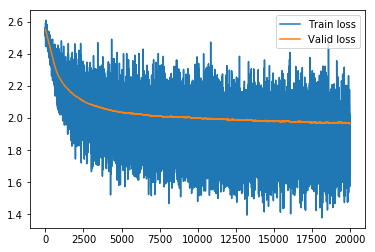

In [52]:
# # Display the learning curve and losses for training, validation, and testing
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(nn.losses['train'], label='Train loss')
plt.plot(nn.losses['valid'], label='Valid loss')
plt.legend()
plt.show()

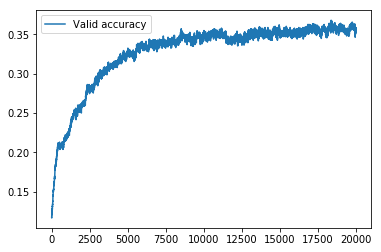

In [53]:
plt.plot(nn.losses['valid_acc'], label='Valid accuracy')
plt.legend()
plt.show()

In [54]:
heading = labels_keys_sorted.copy()
heading.insert(0, 'Id')
heading

['Id',
 'Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [55]:
y_pred, y_logits = nn.test(X_test)
y_prob = l.softmax(y_logits)
y_prob.shape, X_test.shape, y_logits.shape, test_y_sample.shape, test_y_sample[:1]

((10400, 13),
 (10400, 26),
 (10400, 13),
 (10400, 14),
    Id   Blues  Country  Electronic    Folk  International    Jazz   Latin  \
 0   1  0.0964   0.0884      0.0121  0.1004         0.0137  0.1214  0.0883   
 
    New_Age  Pop_Rock     Rap  Reggae     RnB   Vocal  
 0   0.0765    0.0332  0.0445  0.1193  0.1019  0.1038  )

In [56]:
pred_list = []
for Id, pred in enumerate(y_prob):
#     print(Id+1, *pred)
    pred_list.append([Id+1, *pred])

In [57]:
pred_file = open(file='prediction.csv', mode='w')
pred_file.write('\n') # because of the previous line        

for idx in range(len(heading)):
    if idx < len(heading) - 1:
        pred_file.write(heading[idx] + ',')
    else:
        pred_file.write(heading[idx] + '\n')        

# len(test), test[0]
# for key in test:
for i in range(len(pred_list)): # rows
    for j in range(len(pred_list[i])): # cols
        if j < (len(pred_list[i]) - 1):
            pred_file.write(str(pred_list[i][j]))
            pred_file.write(',')
        else: # last item before starting a new line
            pred_file.write(str(pred_list[i][j]) + '\n')        

# pred_file.write(-',')
pred_file.close()

In [58]:
pd.read_csv(filepath_or_buffer='prediction.csv').head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.010647,0.004896,0.012471,0.002118,0.016096,0.017254,0.046172,0.001188,0.002949,0.551503,0.264051,0.059004,0.011651
1,2,0.030747,0.012813,0.007274,0.013305,0.045791,0.006773,0.164911,0.004129,0.006409,0.098120,0.519561,0.047751,0.042415
2,3,0.008564,0.004754,0.027937,0.003126,0.029869,0.002235,0.043096,0.002546,0.030980,0.161440,0.603927,0.078159,0.003368
3,4,0.043036,0.037409,0.119196,0.056499,0.044434,0.008155,0.015681,0.010611,0.018757,0.030824,0.455670,0.049698,0.110029
4,5,0.007092,0.003267,0.015530,0.001036,0.016419,0.000737,0.027765,0.000572,0.013375,0.552937,0.338626,0.021814,0.000830


In [59]:
pd.read_csv(filepath_or_buffer='prediction.csv').shape, test_y_sample.shape

((10400, 14), (10400, 14))

In [60]:
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991
